In [18]:
import numpy as np
import matplotlib.pyplot as plt
import RestrictedBoltzmannMachine as RBM
import wandb

In [2]:
data = None
with open("train-images.idx3-ubyte", "rb") as f:
    data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

data = (data > 128).astype(np.uint8)

validation_data = None
with open("t10k-images.idx3-ubyte", "rb") as f:
    validation_data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

validation_data = (validation_data > 128).astype(np.uint8)


In [3]:
wandb.init(
    project="restricted-boltzmann-machine-noise",

    config={
        "learning_rate": 0.01,
        "architecture": "RBM",
        "dataset": "MNIST",
        "epochs": 10,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: lucasericsson (lucasericsson222). Use `wandb login --relogin` to force relogin


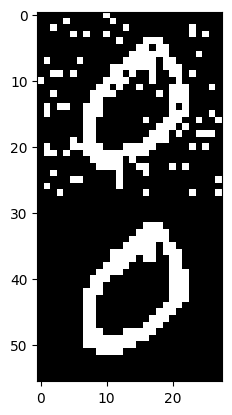

In [4]:
my_rbm = RBM.RestrictedBoltzmannMachine(28*28*2, 1000)

noise = np.random.rand(60000, 28*28) < .10
noisy_data = np.copy(data) ^ noise
new_data = np.column_stack((noisy_data, data))

myin = new_data[1]
inimg = myin.reshape(28*2,28).copy()
plt.imshow(inimg, cmap='gray')
plt.show()

In [5]:
my_rbm.contrastive_divergence(new_data, validation_data, num_epochs=10)

(60000, 1568)
Epoch: 0
current_weight_diff: 10.300189349117739
sqrd_recon_error: 0.374375
Epoch: 1
current_weight_diff: 3.8682894245678314
sqrd_recon_error: 0.28920918367346937
Epoch: 2
current_weight_diff: 2.359281920114182
sqrd_recon_error: 0.23942602040816324
Epoch: 3
current_weight_diff: 1.8519578824689855
sqrd_recon_error: 0.23377551020408163
Epoch: 4
current_weight_diff: 1.3792281003480011
sqrd_recon_error: 0.1993686224489796
Epoch: 5
current_weight_diff: 1.3455563891820341
sqrd_recon_error: 0.20429846938775512
Epoch: 6
current_weight_diff: 0.9370373433600683
sqrd_recon_error: 0.21022959183673467
Epoch: 7
current_weight_diff: 0.9986537403714206
sqrd_recon_error: 0.2074936224489796
Epoch: 8
current_weight_diff: 3.5790025727787733
sqrd_recon_error: 0.19600127551020408
Epoch: 9
current_weight_diff: 0.8395448574678904
sqrd_recon_error: 0.20563775510204083


In [6]:
wandb.finish()

wandb: ERROR Problem finishing run
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wandb/sdk/wandb_run.py", line 2313, in _atexit_cleanup
    self._on_finish()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wandb/sdk/wandb_run.py", line 2567, in _on_finish
    self._footer_file_pusher_status_info(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wandb/sdk/wandb_run.py", line 3749, in _footer_file_pusher_status_info
    Run._footer_single_run_file_pusher_status_info(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wandb/sdk/wandb_run.py", line 3802, in _footer_single_run_file_pusher_status_info
    printer.progress_close()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wandb/sdk/lib/printer.py", line 292, in progress_close
    self._progress.close()
  Fil

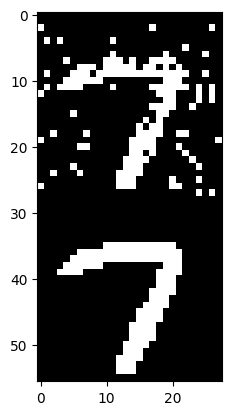

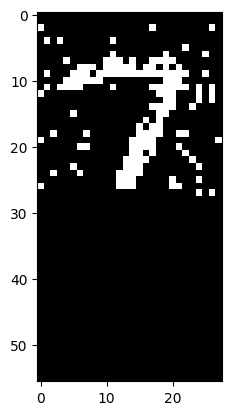

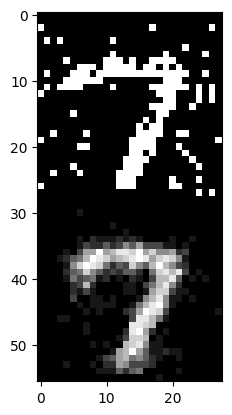

In [17]:
data2 = None
with open("t10k-images.idx3-ubyte", "rb") as f:
    data2 = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

data2 = (data2 > 128).astype(np.uint8)

noise = np.random.rand(10000, 28*28) < .10
noisy_data = np.copy(data2) ^ noise
new_data2 = np.column_stack((noisy_data, data2))

myin = new_data2[np.random.randint(0,10000)]
inimg = myin.reshape(28*2,28).copy()
plt.imshow(inimg, cmap='gray')
plt.show()
inimg[29:, :] = 0
plt.imshow(inimg, cmap='gray')
plt.show()

out = my_rbm.conditional_gibbs_sample(np.matrix(inimg.reshape(1, 28*28*2)).T, 1)
for i in range(0, 10):
    out += my_rbm.conditional_gibbs_sample(np.matrix(inimg.reshape(1, 28*28*2)).T, 10)


out = out.astype(np.uint8)
img = out.reshape(28*2,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image